In [ ]:
# uploading the images that I have chosen with their internet addresses
!wget 'https://blogger.googleusercontent.com/img/a/AVvXsEipYPln6ILn6yJQTYieuqdd5zU-8KZPjQNlJ5rmnEB7PxijHIOc15FzxbRYrwwKDdf4ZyEFc-HnJAjVsQZ9GU8B7tuppDoyq7HtryttYMjHcJWOLl4gJ6L4ynzWg5XdwSsWXNKTZ-noNmsdCRMQwrxy_zZV8E2F4o-whs1CFvOzugrCcpkaCjVS9HqB5w'

--2023-05-05 06:39:37--  https://blogger.googleusercontent.com/img/a/AVvXsEipYPln6ILn6yJQTYieuqdd5zU-8KZPjQNlJ5rmnEB7PxijHIOc15FzxbRYrwwKDdf4ZyEFc-HnJAjVsQZ9GU8B7tuppDoyq7HtryttYMjHcJWOLl4gJ6L4ynzWg5XdwSsWXNKTZ-noNmsdCRMQwrxy_zZV8E2F4o-whs1CFvOzugrCcpkaCjVS9HqB5w
Resolving blogger.googleusercontent.com (blogger.googleusercontent.com)... 74.125.26.132, 2607:f8b0:400c:c04::84
Connecting to blogger.googleusercontent.com (blogger.googleusercontent.com)|74.125.26.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151155 (148K) [image/png]
Saving to: ‘AVvXsEipYPln6ILn6yJQTYieuqdd5zU-8KZPjQNlJ5rmnEB7PxijHIOc15FzxbRYrwwKDdf4ZyEFc-HnJAjVsQZ9GU8B7tuppDoyq7HtryttYMjHcJWOLl4gJ6L4ynzWg5XdwSsWXNKTZ-noNmsdCRMQwrxy_zZV8E2F4o-whs1CFvOzugrCcpkaCjVS9HqB5w’

AVvXsEipYPln6ILn6yJ 100%[===================>] 147.61K  --.-KB/s    in 0.002s  

2023-05-05 06:39:37 (86.8 MB/s) - ‘AVvXsEipYPln6ILn6yJQTYieuqdd5zU-8KZPjQNlJ5rmnEB7PxijHIOc15FzxbRYrwwKDdf4ZyEFc-HnJAjVsQZ9GU8B7tuppDoyq7Htrytt

In [ ]:
# importing the needed classes to show and process the images
import cv2
from matplotlib import pyplot as plt

# reading lenna image
lenna = cv2.imread('AVvXsEipYPln6ILn6yJQTYieuqdd5zU-8KZPjQNlJ5rmnEB7PxijHIOc15FzxbRYrwwKDdf4ZyEFc-HnJAjVsQZ9GU8B7tuppDoyq7HtryttYMjHcJWOLl4gJ6L4ynzWg5XdwSsWXNKTZ-noNmsdCRMQwrxy_zZV8E2F4o-whs1CFvOzugrCcpkaCjVS9HqB5w')
lenna = cv2.cvtColor(lenna, cv2.COLOR_BGR2GRAY)               # converting it from BGR to GRAY


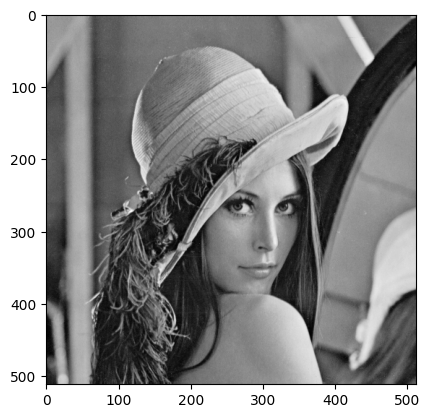

In [ ]:
plt.imshow(lenna, cmap = 'gray')                   # showing the input image on the screen
plt.show()

In [ ]:
import numpy as np
# computes and prints the magnitudes and filtered result
def butterworthHighpassFilter(img, D0, n):
  F = np.fft.fft2(img)              # applying fourier transform

  plt.imshow(np.log(1 + np.abs(F)), cmap = 'jet')       # printing the magnitude of fourier transform
  plt.title("Fourier Transform Magnitude")
  plt.colorbar()
  plt.show()

  Fshift = np.fft.fftshift(F)              # shifting the fourier transform

  plt.imshow(np.log(1 + np.abs(Fshift)), cmap = 'jet')       # printing the magnitude of shifted fourier transform
  plt.title("Shifted Fourier Transform Magnitude")
  plt.colorbar()
  plt.show()

  M,N = img.shape
  H = np.zeros((M,N), dtype = np.float64)         # creating new filter and filling it with zeros

  for i in range(M):
    for j in range(N):
      D = np.sqrt((i-M/2)**2 + (j-N/2)**2)        # applying the Butterworth High Pass Filter Formula
      H[i,j] = 1- 1 / (1 + (D / D0)** (2*n))        # and filling into the filter H

  plt.imshow(H, cmap='gray')       # printing the magnitude of filter H
  plt.title("Filter H")
  plt.show()

  Gshift = Fshift * H         # finding the filtering result in frequency domain

  plt.imshow(np.log(1 + np.abs(Gshift)), cmap = 'gray') # printing the filtering result in frequency domain
  plt.title("Filtering Result in Frequency Domain")
  plt.show()

  G = np.fft.ifftshift(Gshift)              # inverse shifting the filtering result in frequency domain
  g = np.abs(np.fft.ifft2(G))               # and then applying inverse fourier transform to it => this is our result

  plt.imshow(g, cmap='gray')                # showing the result image
  plt.title("Filtering Result in Spatial Domain")
  plt.show()


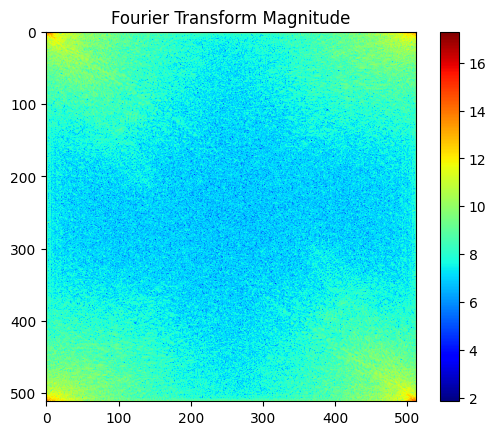

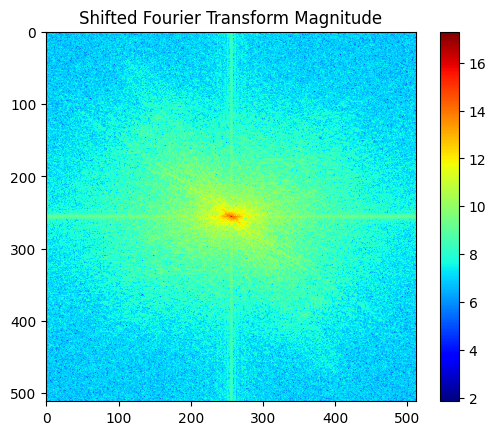

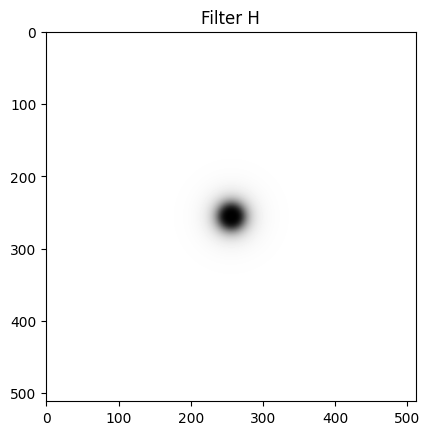

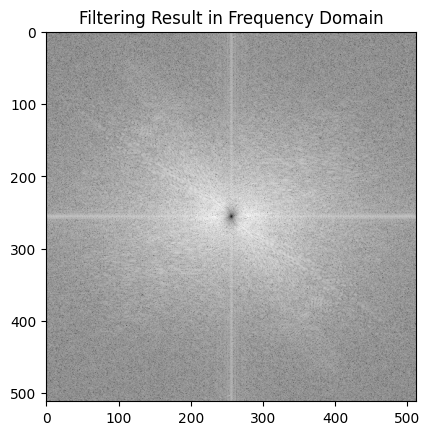

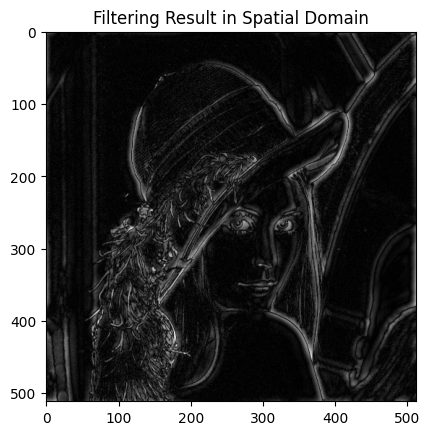

In [ ]:
butterworthHighpassFilter(lenna,20,2) # applying the function where D0 = 20 & n = 2

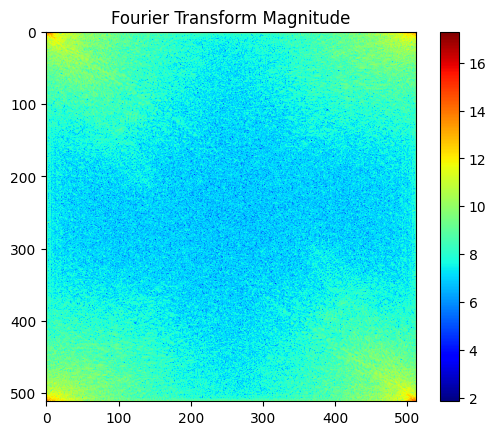

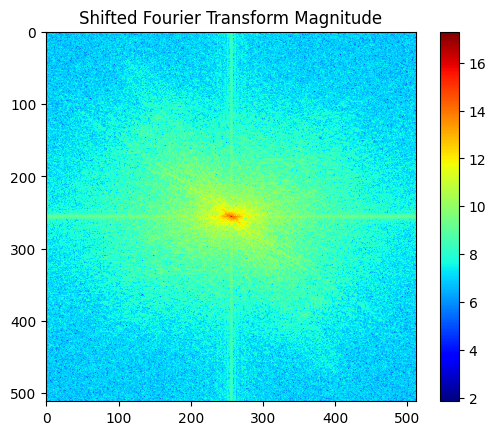

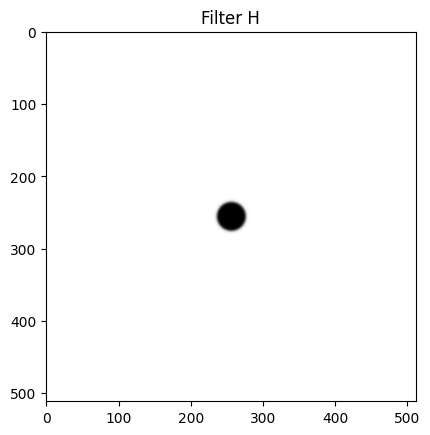

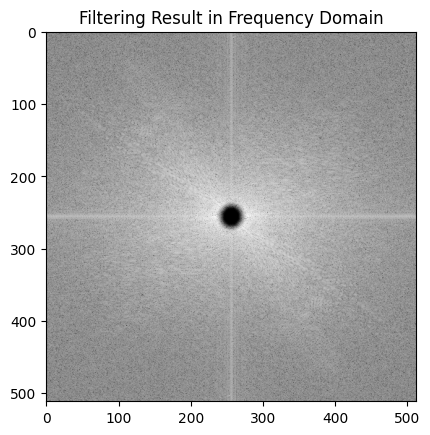

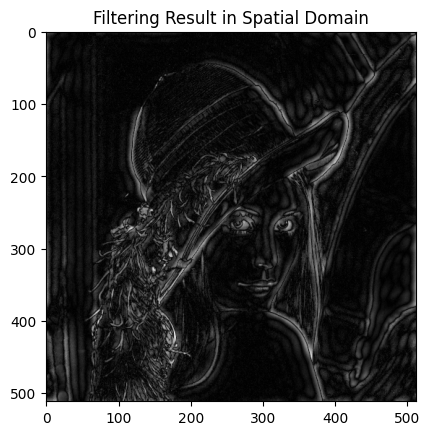

In [ ]:
butterworthHighpassFilter(lenna,20,10) # applying the function where D0 = 20 & n = 10

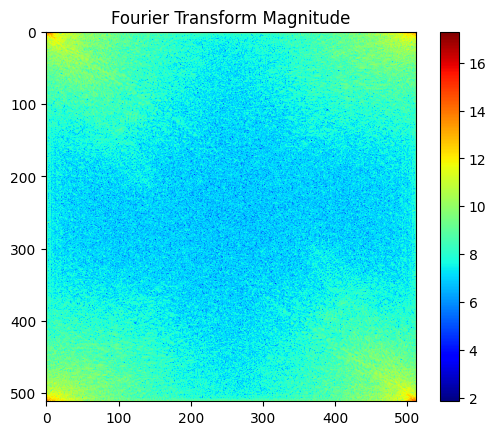

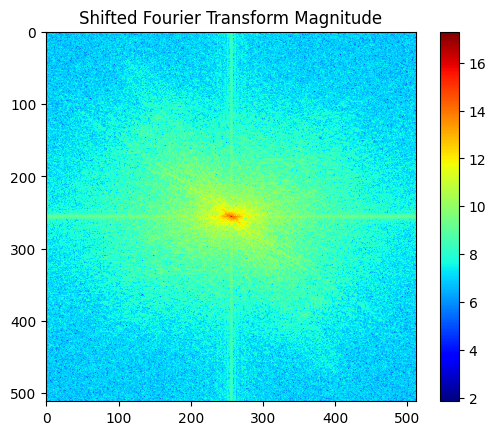

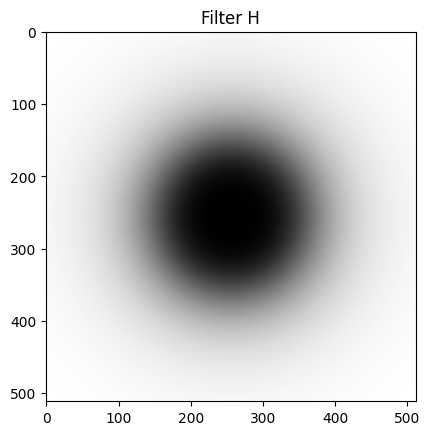

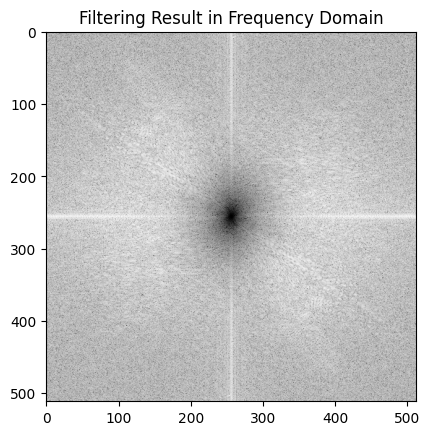

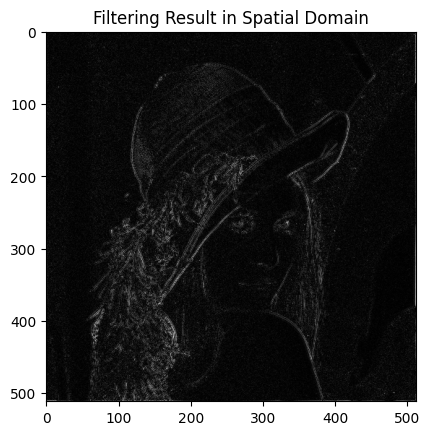

In [ ]:
butterworthHighpassFilter(lenna,120,2) # applying the function where D0 = 120 & n = 2

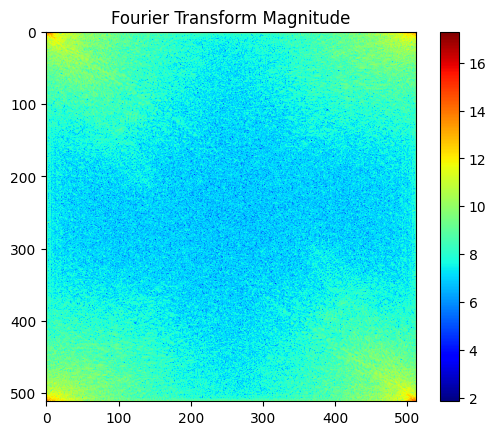

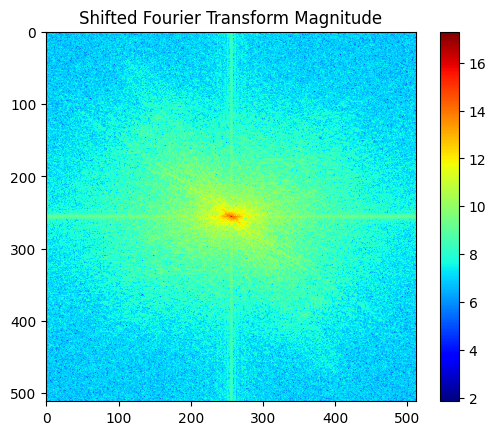

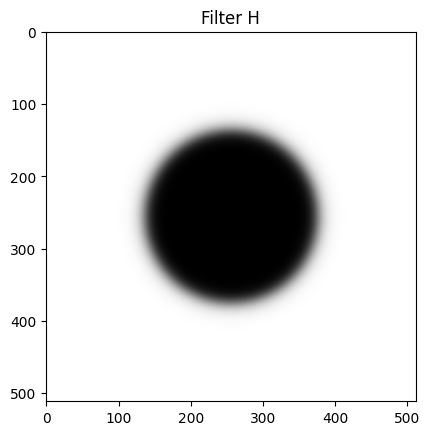

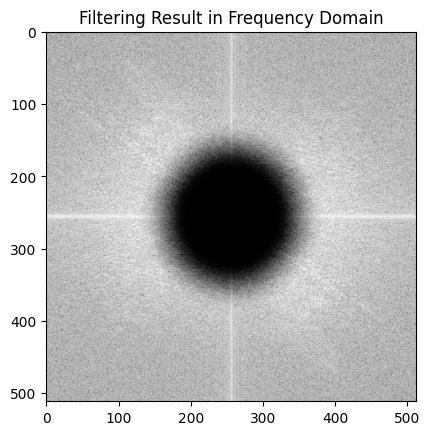

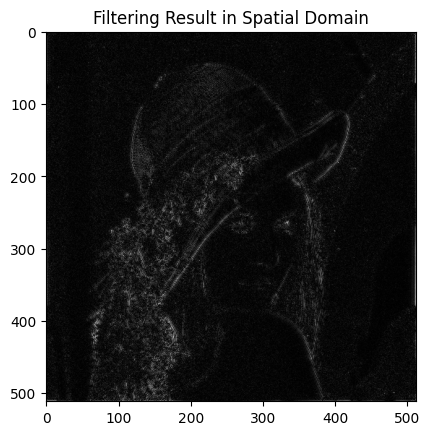

In [ ]:
butterworthHighpassFilter(lenna,120,10) # applying the function where D0 = 120 & n = 10